In [32]:
import pandas as pd
import numpy as np
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import NormalIndPower
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math

## Solve for Sample size - T-test

In [64]:
#parameters
effect = 0.120
alpha = 0.05
power = 0.8
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect, power = power, nobs1 = None, ratio = 1.0, alpha= alpha)
print('Sample size: %.3f' %result)

Sample size: 1091.081


In [12]:
#Solve for effect size:
nobs = 3000
alpha = 0.05
power = 0.8
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=None, power = power, nobs1 = nobs, ratio = 1.0, alpha= alpha)
print('Effect size: %.3f' %result)

Effect size: 0.072


### How are effects calculated?
standardized effect size, difference between the two means divided by the standard deviation. effect_size has to be positive.

Cohen's d: difference between the group's mean divided by the standard deviation of either group

The last thing to consider it the effect size, which is the quantified magnitude of a phenomenon present in the population. Effect size can be calculated using different metrics depending on the context, for example:
Pearson’s correlation
Regression coefficient
Difference in means between two groups, e.g., Cohen’s d
https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26

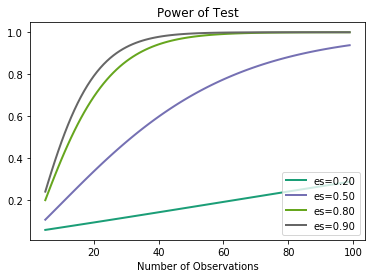

In [14]:
#Plot power curves:
#paratemeters for power analysis
effect_sizes = np.array([0.2, 0.5, 0.8, 0.90])
sample_sizes = np.array(range(5, 100))
# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var = 'nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

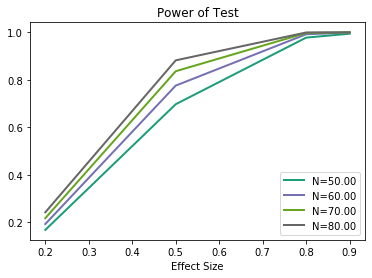

In [19]:
sample_sizes = np.array([50, 60, 70, 80])
analysis.plot_power(dep_var = 'effect_size', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()

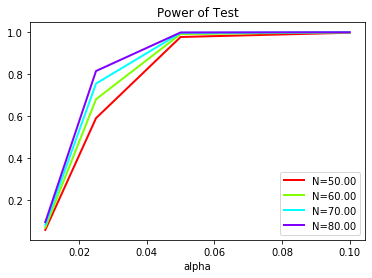

In [60]:
alpha = np.array([0.01, 0.025, 0.05, 0.1])
analysis.plot_power(dep_var = 'alpha', nobs=sample_sizes, effect_size=effect_sizes, alpha=alpha)
plt.show()

In [23]:
# https://statisticsbyjim.com/hypothesis-testing/sample-size-power-analysis/

## 2 porportion Z-test

In [25]:
def z_calc(p1, p2, n1, n2):
    p_star = (p1*n1 + p2*n2) / (n1 + n2)
    return (p2 - p1) / math.sqrt(p_star*(1 - p_star)*((1.0 / n1) + (1.0 / n2)))

In [26]:
def sample_required(p1, p_diff, alpha):
    if p_diff <= 0:
        raise ValueError("p_diff must be > 0")
    n = 1
    while True:
        z = z_calc(p1, p1+p_diff, n1=n, n2=n)
        p = 1 - stats.norm.cdf(z)
        if p < alpha:
            break
        n += 1
    return n

In [59]:
sample_required(0.2, 0.05, 0.05)

378

In [53]:
#Another way
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.2, 0.25)
print('Effect size: %.3f' %es)

Effect size: -0.120


### Effect size for a test comparing two proportions (Cohen's D)
It's define as:
2 * (arcsin(sqrt(prop1)) - arcsin(sqrt(prop2)))
Links: https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Tests_for_Two_Proportions_using_Effect_Size.pdf

In [62]:
power = 0.8
alpha = 0.05
normal = NormalIndPower()
result = normal.solve_power(es, power=power, alpha=alpha, ratio=1, alternative = 'two-sided')
print('Sample size required: %.3f' %result)

Sample size required: 1091.896
